<a href="https://colab.research.google.com/github/fathimayusuff/CSI5155_ML/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
from sklearn import svm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Import the CSV File

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [123]:
data = pd.read_csv("online_shoppers_intention.csv") 
data.shape
data.head
display(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False


# Visualization of data

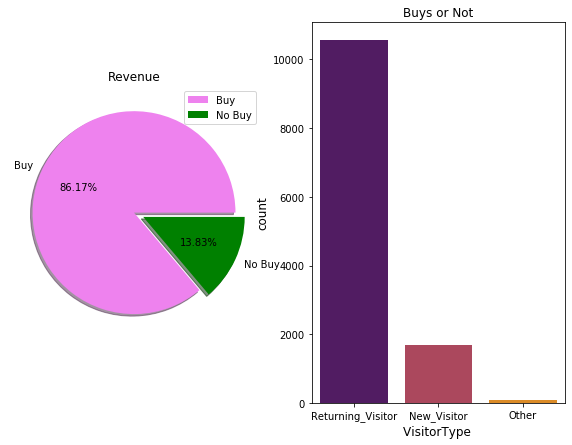

In [124]:
plt.rcParams['figure.figsize'] = (10, 7)
size = [10551, 1694]
colors = ['violet', 'green']
labels = ["Buy", "No Buy"]
explode = [0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Revenue', fontsize = 12)
plt.axis('off')
plt.legend()

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['VisitorType'], palette = 'inferno')
plt.title('Buys or Not', fontsize = 12)
plt.xlabel('VisitorType ', fontsize = 12)
plt.ylabel('count', fontsize = 12)


plt.show()

No handles with labels found to put in legend.


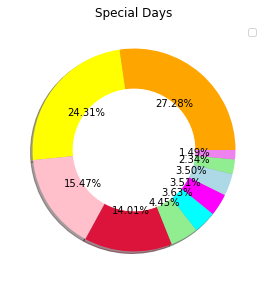

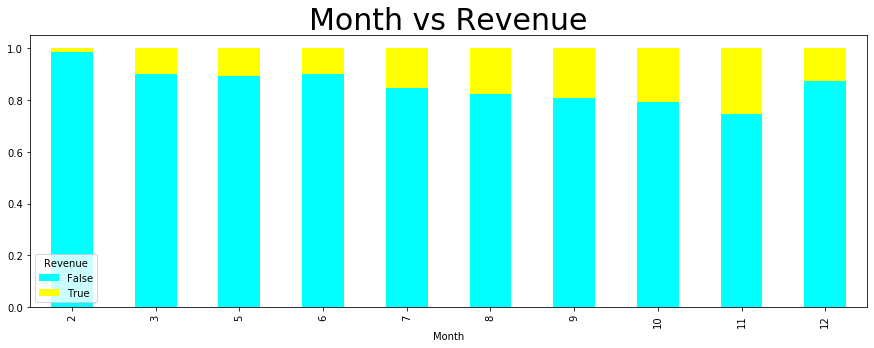

In [125]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 12)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['cyan', 'yellow'])
plt.title('Month vs Revenue', fontsize = 30)
plt.show()


plt.show()

# Outliers

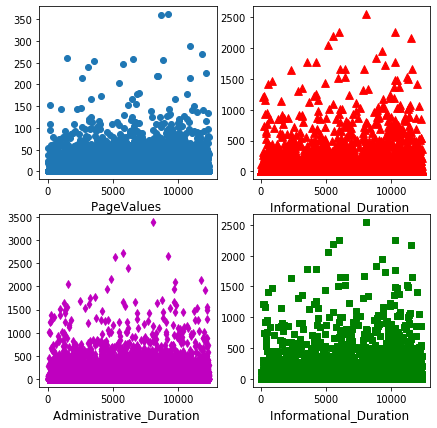

In [126]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.subplot(2, 2, 1)
y=data['PageValues']
m=data.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y,)
plt.xlabel('PageValues ', fontsize = 12)

plt.subplot(2, 2, 2)
y=data['Informational_Duration']
m=data.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y,s=60, c='red', marker='^')
plt.xlabel('Informational_Duration ', fontsize = 12)

plt.subplot(2,2,3)
y=data['Administrative_Duration']
m=data.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y,s=30, c='m', marker='d')
plt.xlabel('Administrative_Duration ', fontsize = 12)

plt.subplot(2,2,4)
y=data['Informational_Duration']
m=data.shape[0]
x=[i for i in range(m)]
plt.scatter(x,y,s=30, c='g', marker='s')
plt.xlabel('Informational_Duration ', fontsize = 12)
plt.show()

# Conversion of Categorical Data to Numeric data

In [0]:
def score_to_numeric(x):
    if x=='Others':
        return 3
    if x=='New_Visitor':
        return 2
    if x=='Returning_Visitor':
        return 1

In [128]:
X = data.select_dtypes(include=[object,bool])
X.head(3)
X.columns


Index(['VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_2 = X.apply(le.fit_transform)
X_2.head()


,VisitorType,Weekend,Revenue
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,1,0


In [130]:

enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape
onehotlabels
X_2

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,VisitorType,Weekend,Revenue
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,1,0
...,...,...,...
12325,2,1,0
12326,2,1,0
12327,2,1,0
12328,2,0,0


In [131]:
!pip install category_encoders

#Encoding: One Hot Encoding | Binary Encoding

In [132]:
import category_encoders as ce
onehotencoder = ce.OneHotEncoder(cols= ['VisitorType']) 
onehotencoder = onehotencoder.fit_transform(X_2) 
onehotencoder

,VisitorType_1,VisitorType_2,VisitorType_3,Weekend,Revenue
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,1,0
...,...,...,...,...,...
12325,1,0,0,1,0
12326,1,0,0,1,0
12327,1,0,0,1,0
12328,1,0,0,0,0


In [133]:
data_new=data
data_new['VisitorType_1']=onehotencoder['VisitorType_1']
data_new['VisitorType_2']=onehotencoder['VisitorType_2']
data_new['VisitorType_3']=onehotencoder['VisitorType_3']

data_new['Weekend']=X_2['Weekend']
data_new=data_new.drop(columns='VisitorType')
data_new

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_1,VisitorType_2,VisitorType_3
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,False,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,False,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,False,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,False,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,False,1,0,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,False,1,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,False,1,0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,False,1,0,0


In [0]:
def min_max_10(val, min, max):
  max_a = max
  min_a = min
  min_norm = 0
  max_norm =1
  x_norm = (val- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm
  return x_norm

In [0]:
data_1=data_new
data_1['Informational']=min_max_10(data_1['Informational'], 0, 50)
data_1['Administrative']=min_max_10(data_1['Administrative'], 0, 50)
data_1['Month']=min_max_10(data_1['Month'], 1, 12)
data_1['OperatingSystems']=min_max_10(data_1['OperatingSystems'], 1, 10)
data_1['Browser']=min_max_10(data_1['Browser'], 1, 10)
data_1['Region']=min_max_10(data_1['Region'], 1, 10)
data_1['TrafficType']=min_max_10(data_1['TrafficType'], 1, 20)
data_1['ProductRelated']=min_max_10(data_1['ProductRelated'], 1, 1000)

In [136]:
data_1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_1,VisitorType_2,VisitorType_3
0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0,False,1,0,0
1,0.00,0.0,0.0,0.0,0.001001,64.000000,0.000000,0.100000,0.000000,0.0,0.090909,0.111111,0.111111,0.000000,0.052632,0,False,1,0,0
2,0.00,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0.090909,0.333333,0.000000,0.888889,0.105263,0,False,1,0,0
3,0.00,0.0,0.0,0.0,0.001001,2.666667,0.050000,0.140000,0.000000,0.0,0.090909,0.222222,0.111111,0.111111,0.157895,0,False,1,0,0
4,0.00,0.0,0.0,0.0,0.009009,627.500000,0.020000,0.050000,0.000000,0.0,0.090909,0.222222,0.222222,0.000000,0.157895,1,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.06,145.0,0.0,0.0,0.052052,1783.791667,0.007143,0.029031,12.241717,0.0,1.000000,0.333333,0.555556,0.000000,0.000000,1,False,1,0,0
12326,0.00,0.0,0.0,0.0,0.004004,465.750000,0.000000,0.021333,0.000000,0.0,0.909091,0.222222,0.111111,0.000000,0.368421,1,False,1,0,0
12327,0.00,0.0,0.0,0.0,0.005005,184.250000,0.083333,0.086667,0.000000,0.0,0.909091,0.222222,0.111111,0.000000,0.631579,1,False,1,0,0
12328,0.08,75.0,0.0,0.0,0.014014,346.000000,0.000000,0.021053,0.000000,0.0,0.909091,0.111111,0.111111,0.222222,0.526316,0,False,1,0,0


In [137]:
data_1.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Weekend                    0
Revenue                    0
VisitorType_1              0
VisitorType_2              0
VisitorType_3              0
dtype: int64

In [138]:
data_1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'VisitorType_1', 'VisitorType_2', 'VisitorType_3'],
      dtype='object')

In [139]:
list=data_1['Revenue']
list.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [140]:
data_sample=data_1
data_sample['Revenue']=X_2['Revenue']
data_sample['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

# UnderSampling majority class

1908
10422


1    1908
0    1908
Name: Revenue, dtype: int64

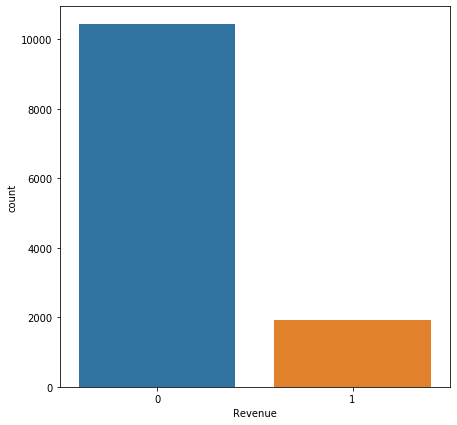

In [141]:
one = len(data_sample[data['Revenue'] == 1]) #minority
zero = len(data_sample[data['Revenue'] == 0])  #majority

print(one)
print(zero)

zero_indices = data_sample[data['Revenue'] == 0].index
random_indices = np.random.choice(zero_indices,one, replace=False)
one_indices = data_sample[data['Revenue'] == 1].index

under_sample_indices = np.concatenate([one_indices,random_indices])
under_sample = data_sample.loc[under_sample_indices]

plt.plot(figsize=(6,6))
sns.countplot(data_sample['Revenue'], data=under_sample)
under_sample['Revenue'].value_counts()

# Finding Most Impotant Features

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06301642 0.04821759 0.03025919 0.02982049 0.0697413  0.07198113
 0.05908449 0.09907024 0.27415846 0.00876215 0.06540528 0.03107109
 0.02880933 0.04125301 0.0432415  0.01459102 0.00982845 0.01126255
 0.00042632]


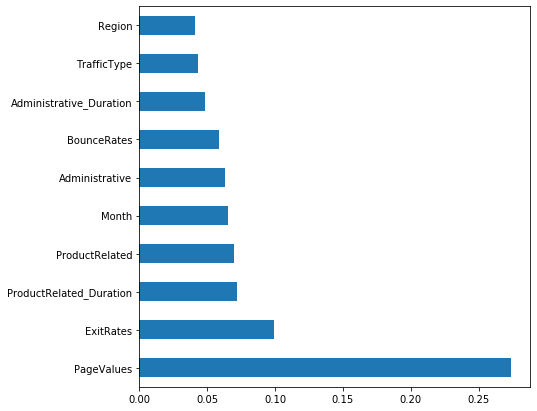

In [142]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
label1= ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_1', 'VisitorType_2', 'VisitorType_3']
X=under_sample[label1]
Y=under_sample['Revenue']
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#1: Linear Classifier: SVM for Sampled Data

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import metrics
label= ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
        'Region', 'TrafficType',
       'VisitorType_1', 'VisitorType_2', 'VisitorType_3']
X1=under_sample[label]
Y1=under_sample['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.4) 

clf1 = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200,
                    fit_intercept=True, tol=1e-3)

clf1 = clf1.fit(X_train,y_train)
scores=cross_val_score(clf1, X1, Y1, cv=10)
y_train_pred = clf1.predict(X_test)
svm_score=scores
svm_acc=metrics.accuracy_score(y_test, y_train_pred)

No handles with labels found to put in legend.


Accuracy: 0.5481335952848723
Confusion Matrix:
 [[109 674]
 [ 16 728]]
              precision    recall  f1-score   support

           0       0.87      0.14      0.24       783
           1       0.52      0.98      0.68       744

    accuracy                           0.55      1527
   macro avg       0.70      0.56      0.46      1527
weighted avg       0.70      0.55      0.45      1527

Area under curve: 0.5588513986734231


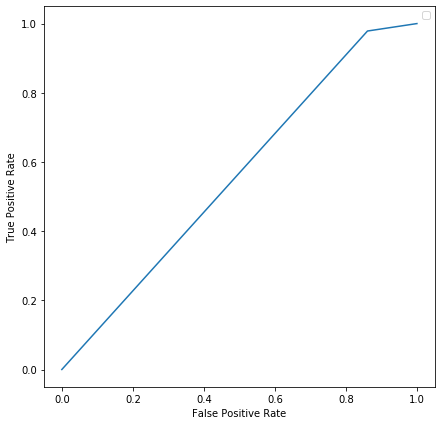

In [144]:

print("Accuracy:",svm_acc)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_train_pred))
print(metrics.classification_report(y_test, y_train_pred))
fpr1, tpr1, threshold=metrics.roc_curve(y_test, y_train_pred)
auc = roc_auc_score(y_test, y_train_pred)
print("Area under curve:",auc)
svmauc=auc
plt.plot(fpr1, tpr1)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# 2: Tree Based: Decision Tree on Sampled Dataset

No handles with labels found to put in legend.


Accuracy: 51.47347740667977 %
Confusion Matrix:
 [[584 174]
 [167 602]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       758
           1       0.78      0.78      0.78       769

    accuracy                           0.78      1527
   macro avg       0.78      0.78      0.78      1527
weighted avg       0.78      0.78      0.78      1527

Area under curve: 0.7766416996339007


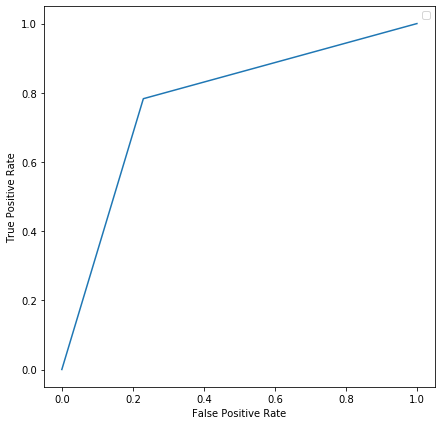

In [145]:
clf = tree.DecisionTreeClassifier(random_state=1)
X3=under_sample[label]
Y3=under_sample['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.4) 
clf = clf.fit(X_train,y_train)
scores=cross_val_score(clf, X3, Y3, cv=10)
y_pred = clf.predict(X_test)
dt_scores=scores
dt_acc=metrics.accuracy_score(y_test, y_train_pred)
print("Accuracy:",dt_acc*100,"%")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr2, tpr2, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
dtauc=auc
plt.plot(fpr2, tpr2)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# 3: Distance Based: KNN on Sampled Dataset

No handles with labels found to put in legend.


Accuracy: 0.7079240340537001
Confusion Matrix:
 [[563 189]
 [257 518]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       752
           1       0.73      0.67      0.70       775

    accuracy                           0.71      1527
   macro avg       0.71      0.71      0.71      1527
weighted avg       0.71      0.71      0.71      1527

Area under curve: 0.7085286547700755


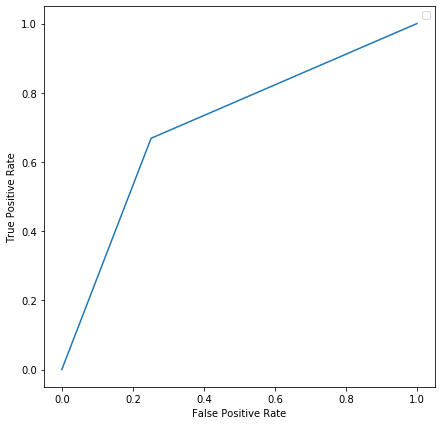

In [146]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=5)
label1= ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_1', 'VisitorType_2', 'VisitorType_3']

X=under_sample[label]
Y=under_sample['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
model1 = model1.fit(X_train,y_train)
scores=cross_val_score(model1, X, Y, cv=10)
knn_score=scores
y_pred = model1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr3, tpr3, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
knnauc=auc
plt.plot(fpr3, tpr3)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [147]:

model = KNeighborsClassifier(n_neighbors=5)

X=data_1[label]
Y=data_1['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4) 
model = model.fit(X_train,y_train)
scores=cross_val_score(model, X, Y, cv=10)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.860705596107056


In [148]:
model1 = KNeighborsClassifier(n_neighbors=3)
label= ['Administrative', 'Administrative_Duration',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
        'Region', 'VisitorType_2']
X=under_sample[label]
Y=under_sample['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
model1 = model1.fit(X_train,y_train)
scores=cross_val_score(model1, X, Y, cv=10)
y_pred = model1.predict(X_test)
knn_acc=metrics.accuracy_score(y_test, y_train_pred)
print("Accuracy:",knn_acc)

Accuracy: 0.5199738048461034


# 4: Rule Based: Dummy Classifier

No handles with labels found to put in legend.


Accuracy: 0.48330058939096265
Confusion Matrix:
 [[566 208]
 [241 512]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       774
           1       0.71      0.68      0.70       753

    accuracy                           0.71      1527
   macro avg       0.71      0.71      0.71      1527
weighted avg       0.71      0.71      0.71      1527

(array([0.        , 0.26873385, 1.        ]), array([0.        , 0.67994688, 1.        ]), array([2, 1, 0]))
Area under curve: 0.7056065145104337


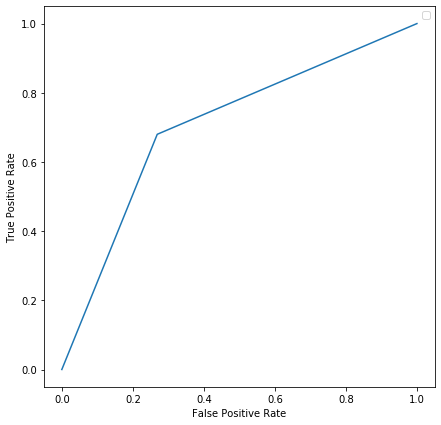

In [149]:
from sklearn.dummy import DummyClassifier

X=under_sample[label]
Y=under_sample['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4) 
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit( X,Y )
model = model.fit(X_train,y_train)
scores=cross_val_score(model, X, Y, cv=10)
y_pred = model.predict(X_test)
rule_scores=scores
rule_acc=metrics.accuracy_score(y_test, y_train_pred)
print("Accuracy:",rule_acc)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.roc_curve(y_test, y_pred))
fpr4, tpr4, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
rbauc=auc
plt.plot(fpr4, tpr4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Naive Bayes on Sampled Dataset

No handles with labels found to put in legend.


Accuracy: 0.7465618860510805
Confusion Matrix:
 [[673  93]
 [294 467]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       766
           1       0.83      0.61      0.71       761

    accuracy                           0.75      1527
   macro avg       0.76      0.75      0.74      1527
weighted avg       0.76      0.75      0.74      1527

(array([0.        , 0.12140992, 1.        ]), array([0.        , 0.61366623, 1.        ]), array([2, 1, 0]))
Area under curve: 0.7461281534877497


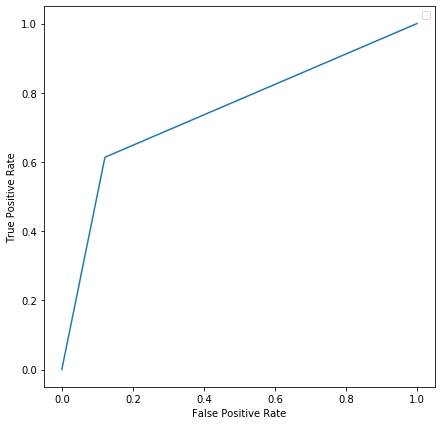

In [150]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

X2=under_sample[label]
Y=under_sample['Revenue']
#print(Y)
#print(X2)

X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.4) 

model_nb = model_nb.fit(X_train,y_train)
scores=cross_val_score(model_nb, X2, Y, cv=10)
y_pred = model_nb.predict(X_test)
nb_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",nb_acc)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.roc_curve(y_test, y_pred))
fpr5, tpr5, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
nbauc=auc
plt.plot(fpr5, tpr5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Bagging Classifier



No handles with labels found to put in legend.


0.7508492393948138
Accuracy: 0.7910936476751801
Confusion Matrix:
 [[603 163]
 [156 605]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       766
           1       0.79      0.80      0.79       761

    accuracy                           0.79      1527
   macro avg       0.79      0.79      0.79      1527
weighted avg       0.79      0.79      0.79      1527

Area under curve: 0.7911064183103858


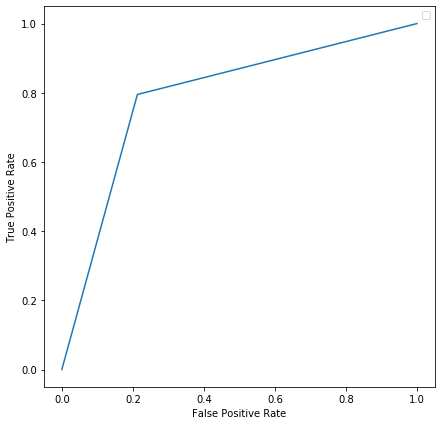

In [151]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X3=under_sample[label]
Y3=under_sample['Revenue']
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
cart = cart.fit(X_train,y_train)
y_pred = cart.predict(X_test)
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X3, Y3, cv=kfold)
print(results.mean())
bag_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",bag_acc)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr6, tpr6, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
bagauc=auc
plt.plot(fpr6, tpr6)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# AdaBoost Algorithm - Boosting

No handles with labels found to put in legend.


0.761101949952591
Accuracy: 0.8330058939096268
Confusion Matrix:
 [[676  90]
 [165 596]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       766
           1       0.87      0.78      0.82       761

    accuracy                           0.83      1527
   macro avg       0.84      0.83      0.83      1527
weighted avg       0.84      0.83      0.83      1527

Area under curve: 0.8328432768481763


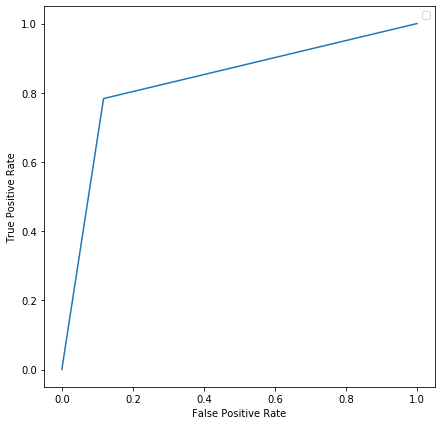

0.761101949952591


In [152]:
# AdaBoost Classification
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model3 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model3 = model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
results = model_selection.cross_val_score(model3, X3, Y3, cv=kfold)
print(results.mean())
boost_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",boost_acc)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr7, tpr7, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
boostauc=auc
plt.plot(fpr7, tpr7)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
print(results.mean())

#Ensemble1: RandomForest 

No handles with labels found to put in legend.


Accuracy: 0.8487229862475442
Confusion Matrix:
 [[655 111]
 [120 641]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       766
           1       0.85      0.84      0.85       761

    accuracy                           0.85      1527
   macro avg       0.85      0.85      0.85      1527
weighted avg       0.85      0.85      0.85      1527

Area under curve: 0.8487020650991721


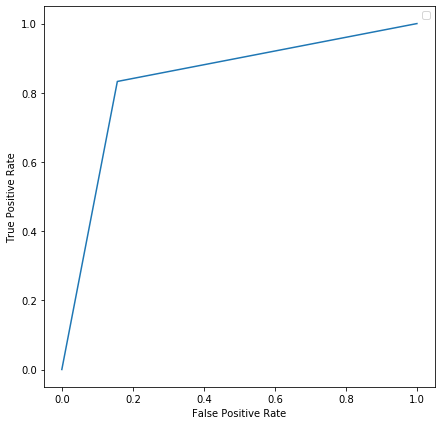

0.7597586950845804


In [153]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model2, X3, Y3, cv=kfold)
rf_score=results
model2 = model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
rf_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",rf_acc)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr8, tpr8, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Area under curve:",auc)
rfauc=auc
plt.plot(fpr, tpr)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
print(results.mean())

#Ensemble2: Logistic Regression | Decision Tree | SVM

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futur

0.7615403113877781
Accuracy: 0.8330058939096268
Confusion Matrix:
 [[676  90]
 [165 596]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       766
           1       0.87      0.78      0.82       761

    accuracy                           0.83      1527
   macro avg       0.84      0.83      0.83      1527
weighted avg       0.84      0.83      0.83      1527

Area under curve: 0.8328432768481763


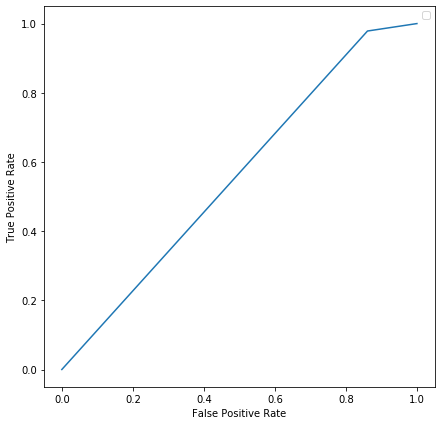

0.7615403113877781


In [154]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model11 = LogisticRegression()
estimators.append(('logistic', model11))
model21 = DecisionTreeClassifier()
estimators.append(('cart', model21))
model31 = SVC()
estimators.append(('svm', model31))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X3, Y3, cv=kfold)
ensemble = model3.fit(X_train,y_train)
y_pred = ensemble.predict(X_test)
print(results.mean())
e2_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",e2_acc)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr9, tpr9, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
e2auc=auc
print("Area under curve:",auc)
plt.plot(fpr1, tpr1)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
print(results.mean())


# Ensemble3: Random Forest | Boosting |Decision Tree

No handles with labels found to put in legend.


0.7584607879512444
Accuracy: 0.842174197773412
Confusion Matrix:
 [[650 116]
 [125 636]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       766
           1       0.85      0.84      0.84       761

    accuracy                           0.84      1527
   macro avg       0.84      0.84      0.84      1527
weighted avg       0.84      0.84      0.84      1527

Area under curve: 0.8421532064104191


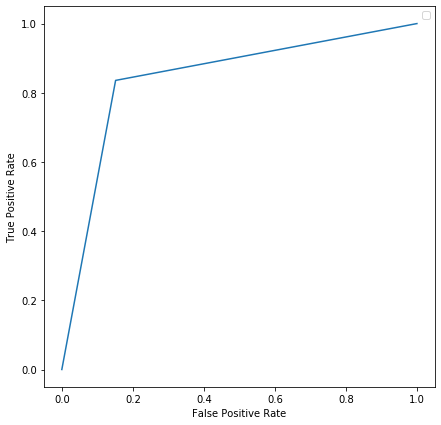

0.7584607879512444


In [155]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model12 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
estimators.append(('randomforest', model12))
model22 = DecisionTreeClassifier()
estimators.append(('cart', model22))
model32 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model32 = model32.fit(X_train,y_train)
estimators.append(('svm', model32))

# create the ensemble model
ensemble1 = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble1, X3, Y3, cv=kfold)
ensemble1 = ensemble1.fit(X_train,y_train)
y_pred = ensemble1.predict(X_test)

model32.score(X_test,y_test)
print(results.mean())
e3_acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",e3_acc)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, threshold=metrics.roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
e3auc=auc
print("Area under curve:",auc)
plt.plot(fpr, tpr)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
print(results.mean())


No handles with labels found to put in legend.


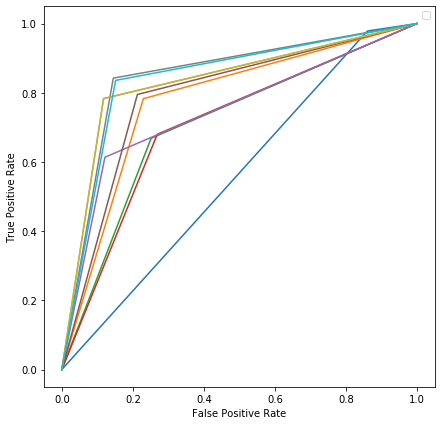

In [156]:

p1=plt.plot(fpr1, tpr1)
p2=plt.plot(fpr2, tpr2)
p3=plt.plot(fpr3, tpr3)
p4=plt.plot(fpr4, tpr4)
p5=plt.plot(fpr5, tpr5)
p6=plt.plot(fpr6, tpr6)
p7=plt.plot(fpr7, tpr7)
p8=plt.plot(fpr8, tpr8)
p9=plt.plot(fpr9, tpr9)
p10=plt.plot(fpr, tpr)
classify=['SVM','DecisionTree','KNN','RuleBased','NaiveBayes','Bagging','Boosting','RandomForest','Ensemble2','Ensemble3']
plt.legend(classify)
#plt.legend(p1, loc='lower right')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [157]:
classify=['SVM','DecisionTree','KNN','RuleBased','NaiveBayes','Bagging','Boosting','RandomForest','Ensemble2','Ensemble3']
df_acc=pd.DataFrame(data=classify,columns=['Classifier'])
df_acc['Accuracy']=[svm_acc*100,dt_acc*100,knn_acc*100,rule_acc*100,nb_acc*100,bag_acc*100,boost_acc*100,rf_acc*100,e2_acc*100,e3_acc*100]
df_acc

,Classifier,Accuracy
0,SVM,54.813360
1,DecisionTree,51.473477
2,KNN,51.997380
3,RuleBased,48.330059
4,NaiveBayes,74.656189
5,Bagging,79.109365
6,Boosting,83.300589
7,RandomForest,84.872299
8,Ensemble2,83.300589
9,Ensemble3,84.217420


In [158]:
df_acc.sort_values(by=['Accuracy'], inplace=True, ascending=False)
df_acc

,Classifier,Accuracy
7,RandomForest,84.872299
9,Ensemble3,84.217420
6,Boosting,83.300589
8,Ensemble2,83.300589
5,Bagging,79.109365
4,NaiveBayes,74.656189
0,SVM,54.813360
2,KNN,51.997380
1,DecisionTree,51.473477
3,RuleBased,48.330059


In [159]:
classify=['SVM','DecisionTree','KNN','RuleBased','NaiveBayes','Bagging','Boosting','RandomForest','Ensemble2','Ensemble3']
df1_acc=pd.DataFrame(data=classify,columns=['Classifier'])
df1_acc['AUC']=[svmauc,dtauc,knnauc,rbauc,nbauc,bagauc,boostauc,rfauc,e2auc,e3auc]
df1_acc

,Classifier,AUC
0,SVM,0.558851
1,DecisionTree,0.776642
2,KNN,0.708529
3,RuleBased,0.705607
4,NaiveBayes,0.746128
5,Bagging,0.791106
6,Boosting,0.832843
7,RandomForest,0.848702
8,Ensemble2,0.832843
9,Ensemble3,0.842153


In [160]:
#df=pd.DataFrame(data, columns = ['SVM', 'DecisionTree','KNN','RandomForest']) 
#df['SVM']=svm_score
df=pd.DataFrame(data=svm_score,columns=['SVM'])
df['DecisionTree']=dt_scores
df['KNN']=knn_score
df['RandomForest']=rf_score
df

,SVM,DecisionTree,KNN,RandomForest
0,0.612565,0.568063,0.738220,0.458115
1,0.926702,0.798429,0.751309,0.827225
2,0.887435,0.808901,0.761780,0.772251
3,0.513089,0.735602,0.651832,0.740838
4,0.798429,0.772251,0.712042,0.685864
5,0.534031,0.785340,0.712042,0.835079
6,0.751309,0.759162,0.693717,0.800525
7,0.568063,0.782723,0.704188,0.813648
8,0.600000,0.794737,0.734211,0.839895
9,0.647368,0.739474,0.700000,0.824147


# Paired Student's t-test

In [161]:
from scipy.stats import ttest_rel
from scipy.stats import friedmanchisquare
def ptest(p):
  if p > 0.05:
    print('Probably the same distribution')
  else:
    print('Probably different distributions')

stat, p = ttest_rel(svm_score,rf_score)
#stat, p = friedmanchisquare(svm_score,rf_score, dt)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=-1.322, p=0.219
Probably the same distribution


In [162]:
stat, p = ttest_rel(svm_score,knn_score)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=-0.777, p=0.457
Probably the same distribution


In [163]:
stat, p = ttest_rel(svm_score,dt_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=-1.575, p=0.150
Probably the same distribution


In [164]:
stat, p = ttest_rel(svm_score,rf_score)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=-1.322, p=0.219
Probably the same distribution


In [165]:
stat, p = ttest_rel(dt_scores,knn_score)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=1.631, p=0.137
Probably the same distribution


In [166]:
stat, p = ttest_rel(dt_scores,rf_score)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=-0.265, p=0.797
Probably the same distribution


In [167]:
stat, p = ttest_rel(knn_score,rf_score)
print('stat=%.3f, p=%.3f' % (stat, p))
ptest(p)

stat=-1.116, p=0.293
Probably the same distribution
